In [ ]:
!pip install vega_datasets

In [3]:
import pandas as pd
import numpy as np
from vega_datasets import data

In [5]:
temp_df = data.sf_temps()
temp_df.set_index('date', inplace=True)

### sf_temps dataset

Question 1

Resample by the day and take the average temperature. Visualize the average temperature over time.

<AxesSubplot:xlabel='date'>

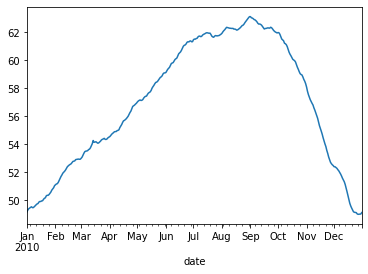

In [6]:
temp_df.resample("D").temp.mean().plot()

### Question 2

Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

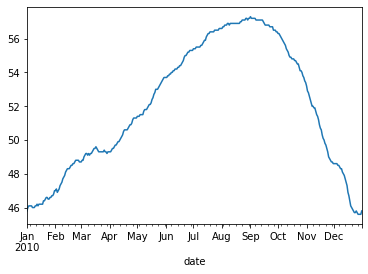

In [7]:
temp_df.resample("D").temp.min().plot()

### Question 3

Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

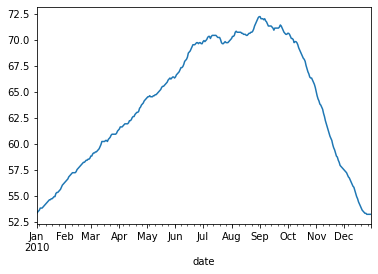

In [8]:
temp_df.resample("D").temp.max().plot()

### Questions 4 & 5

Which month is the coldest, on average?

Which month has the highest average temperature?

In [11]:
temp_df.resample('M').temp.mean().idxmin()

Timestamp('2010-01-31 00:00:00', freq='M')

In [12]:
temp_df.resample('M').temp.mean().idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

### Question 6

Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [13]:
minmax_df = temp_df.resample('D').temp.agg(['min', 'max'])

In [14]:
minmax_df['change'] = minmax_df['max'] - minmax_df['min']
minmax_df.head()

,min,max,change
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [15]:
minmax_df.resample('M').change.mean().idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

### seattle_weather dataset

Question 1

Which year and month combination has the highest amount of precipitation?

In [17]:
seattle_df = data.seattle_weather()
seattle_df.set_index('date', inplace=True)

In [19]:
seattle_df.resample('M').precipitation.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

### Question 2

Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

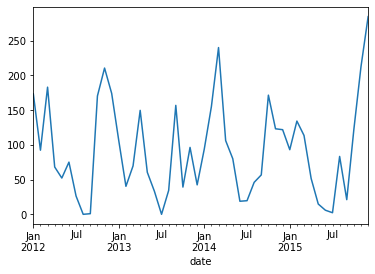

In [20]:
seattle_df.resample('M').precipitation.sum().plot()

### Question 3

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

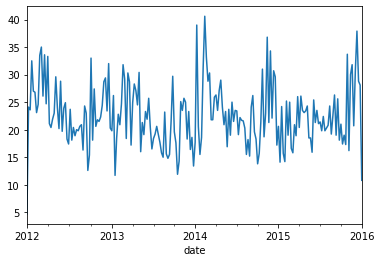

In [23]:
seattle_df.resample('W').wind.sum().plot()

### Question 4

which month year combination is the windiest?

In [24]:
seattle_df.resample('M').wind.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

### Question 5

What's the sunniest year? 

In [25]:
seattle_df.resample('Y').weather.value_counts()

date        weather
2012-12-31  rain       191
            sun        118
            drizzle     31
            snow        21
            fog          5
2013-12-31  sun        205
            fog         82
            rain        60
            drizzle     16
            snow         2
2014-12-31  sun        211
            fog        151
            rain         3
2015-12-31  sun        180
            fog        173
            drizzle      7
            rain         5
Name: weather, dtype: int64

### Question 6

In which month does it rain the most?

In [26]:
rain_by_month = pd.DataFrame(seattle_df.resample('M').precipitation.sum())
rain_by_month.head()

,precipitation
date,
2012-01-31,173.3
2012-02-29,92.3
2012-03-31,183.0
2012-04-30,68.1
2012-05-31,52.2


In [27]:
rain_by_month['month'] = rain_by_month.index.strftime('%B')
rain_by_month.groupby('month').precipitation.sum().idxmax()

'November'

### Question 7

Which month has the most number of days with a non-zero amount of precipitation?

In [29]:
seattle_df['rained'] = np.where(seattle_df['precipitation'] == 0, 0, 1)
seattle_df.resample('M').rained.sum().idxmax()

Timestamp('2012-12-31 00:00:00', freq='M')

## flights_20k dataset

### Question 1

Convert any negative delays to 0.

In [30]:
flights = data.flights_20k()
flights['delay'] = np.where(flights['delay'] < 0, 0, flights['delay'])

### Question 2
which hour of the day has the most delays?

In [31]:
flights.set_index('date', inplace=True)

In [32]:
flights['hour'] = flights.index.strftime('%H')
flights.groupby('hour').delay.mean().idxmax()

'03'

### Question 3

Does the day of the week make a difference in the delay amount?

In [33]:
flights['day_of_week'] = flights.index.strftime('%A')
flights.groupby('day_of_week').delay.mean()

day_of_week
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

### Question 4

Does the month make a difference in the delay amount?

In [34]:
flights['month'] = flights.index.strftime('%B')
flights.groupby('month').delay.mean()

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64